# Fourth Session, Notebook # 8:  Practicing with Sys in Python and writing our own Python scripts

## Today's agenda:
0. __Workshop Overview__:
    * __When__: August 15th, 12:30pm-5pm
    * __Where__: CUNY Graduate Center, Room 5382
    * __What__: Today we will be practicing with Sys in Python and writing our own Python scripts!
    * __Want__ to lead a session for a topic? Some Days there will be small hack sessions for people to discuss problems they're working on.
    * __Online Resources__:  __https://daxfeliz.github.io/cunybridgebootcamp/__
    * __Program Schedule__: __https://tinyurl.com/mu88x9xc__   
&nbsp;

1. __This session__:
* Introduction to the Sys python library
* Writing our own Python scripts
* Practicing reading in our Python scripts
</br>
&nbsp;

2. __Next session__:
    * Introduction to Pandas! __Make sure you bring your laptop to this session and future sessions__.


# Sys

The __`sys`__ module provides a lot of information about the Python interpreter. The functionality that we're interested in is the ability to use __`sys`__ to parse information from the command line. This can be used to make programs and modules useful when run from the command line.

After importing __`sys`__, __```sys.argv```__ provides a list of all the parameters that the current python script was called with. A program that doesn't take any paramters will only have one item in this list, where the 0th item is the name of the program. Any paramters that are passed into the script will be listed after.

From a command line, try running the following in the notebooks directory:  

```sh

python arguments.py arg1 arg2

```

In this script from http://www.python-course.eu/sys_module.php, we see that the 0th term in sys.argv is arguments.py and the rest of the list is the parameters we passed in. This will come in handy with our module.

The contents of `arguments.py` looks like:


```python
#!/usr/bin/python

import sys

# it's easy to print this list of course:
print (sys.argv)

# or it can be iterated via a for loop:
print(' ')
for i in range(len(sys.argv)):
    if i == 0:
        print ("Function name: %s" % sys.argv[0])
        print(' ')
    else:
        print ("%d. argument: %s" % (i,sys.argv[i]))
        print(' ')        


# copied from http://www.python-course.eu/sys_module.php
```

# Writing a Module

There will always be some code that you have to write yourself. When you're working on a single script that does the same things repeatedly, it makes sense to start writing functions within the script. However, you may also have operations that are carried out in multiple scripts for various projects. In this case, we'd like to be able to use that same function in all scripts. This will be very similar to writing a single function, so we'll try out the function, but the file that contains our module is stellar_radius.py

For this function, we'll say that we want to be able to take the mass of a star and calculate the radius. For stars larger than the sun, we can approximate this as $R=M^{0.57}$. For smaller-mass stars, we can approximate this as $R=M^{0.8}$

In [18]:
def stellar_r(mass):
    """
    Calculate the radius of a star based on its mass relative to the Sun.

    The radius is estimated using different scaling laws depending on whether
    the star's mass is smaller than, larger than, or equal to the Sun's mass.

    Parameters:
    mass (float): The mass of the star in solar masses. 

    Returns:
    float: The estimated radius of the star in solar radii.

    Notes:
    - For stars with mass less than 1 solar mass, the radius is calculated as
      mass raised to the power of 0.8.
    - For stars with mass greater than 1 solar mass, the radius is calculated as
      mass raised to the power of 0.57.
    - For stars with mass equal to 1 solar mass, the radius is set to 1 solar radius.
    """
    if mass<1: #smaller stars than sun
        starR=mass**0.8
    if mass>1:#larger stars than sun
        starR=mass**0.57
    if mass==1: #stars with equal mass of sun
        starR=1
    return starR

## This is a really simple equation, but by making this a function, we can make it more sophisticated or change the exponent in one spot, and it will be updated everywhere. We can quickly test this out to see that the function works the way that we expect when called.

In [19]:
print(stellar_r(1.5),'solar radii')
print(stellar_r(1),'solar radii')
print(stellar_r(0.5),'solar radii')

1.2600042722366593 solar radii
1 solar radii
0.5743491774985174 solar radii


## You can also pass a NumPy array to the function

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

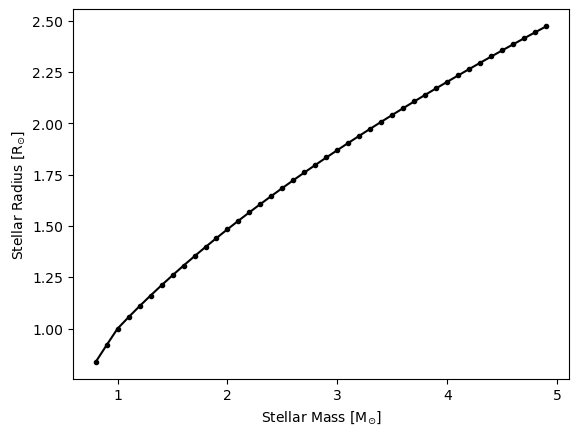

In [21]:
mass_arr = np.arange(0.8, 5, 0.1)

radius_arr=[]
for mass in mass_arr:
    radius_arr.append( stellar_r( mass ) )

plt.plot(mass_arr,radius_arr,'k.-')
plt.xlabel(r'Stellar Mass [M$_{\odot}$]')
plt.ylabel(r'Stellar Radius [R$_{\odot}$]')
plt.show()




## If we want to use this module that we've created, we can inport it as we have with other modules. When we import it, we're using the file name, and then when we call the function, we have to include the function name and for this module those two are the same. These could also be different, where the file name is one thing, and then it contains one or more functions that have names that don't match it.

In [22]:
import stellar_radius as staR
print (staR.stellar_radius(mass_arr))


[0.83651164 0.91916612 1.         1.07923035 1.157031   1.2335441
 1.30888783 1.38316187 1.45645136 1.52882979 1.60036117 1.6711017
 1.74110113 1.81040373 1.87904917 1.94707315 2.01450799 2.08138302
 2.14772503 2.21355854 2.27890607 2.34378839 2.40822469 2.47223275
 2.53582911 2.59902916 2.66184727 2.7242969  2.78639063 2.8481403
 2.90955705 2.97065136 3.03143313 3.09191172 3.15209597 3.21199429
 3.27161463 3.33096455 3.39005126 3.44888161 3.50746212 3.56579904]


## This is what the "`stellar_radius.py`" file looks like:

```python
#!/usr/bin/env python
import numpy as np
import sys

def stellar_r(mass):
    """
    Calculate the radius of a star based on its mass relative to the Sun.

    The radius is estimated using different scaling laws depending on whether
    the star's mass is smaller than, larger than, or equal to the Sun's mass.

    Parameters:
    mass (float): The mass of the star in solar masses. 

    Returns:
    float: The estimated radius of the star in solar radii.

    Notes:
    - For stars with mass less than 1 solar mass, the radius is calculated as
      mass raised to the power of 0.8.
    - For stars with mass greater than 1 solar mass, the radius is calculated as
      mass raised to the power of 0.57.
    - For stars with mass equal to 1 solar mass, the radius is set to 1 solar radius.
    """
    if mass<1: #smaller stars than sun
        starR=mass**0.8
    if mass>1:#larger stars than sun
        starR=mass**0.57
    if mass==1: #stars with equal mass of sun
        starR=1
    return starR

if __name__ == "__main__":
    print(stellar_radius(float(sys.argv[1]))) #mass
```
    

## This all works for if we simply want to import the function into another python function, but it can often be useful to be able to run these functions from a command line (for example, so that we can use execute this python function in another scripting language or so that we can run it from the command line for quick calculations)

## The simplest form of a module file just contains a series of functions without running any of them, but we can add some additional code to the module file that will be run if this file is executed rather than imported.

## This code consists of an if statement at the end. The \_\_name\_\_ property relates to what the code is called, and if the file is called directly, it will be True. If the code is imported, then this code won't be executed. What follows is a single line that calls the stellar radius function using the argument that will get passed in from the command line.

```python
    if __name__ == "__main__":  
       print (stellar_radius(float(sys.argv[1]))) #mass
```

# The  
```python 
if __name__ == "__main__:"
``` 
# statement is a common Python idiom used to distinguish between when a script is run directly versus when it is imported as a module in another script. Here’s a breakdown of how it works:

# ``__name__`` Variable: In Python, every module (i.e., Python file) has a built-in attribute called ``__name__``. When a module is run directly, ``__name__`` is set to ``"__main__"``. However, when a module is imported into another script, ``__name__`` is set to the module’s name.

# Purpose: The ``if __name__ == "__main__"``: block allows you to write code that will only execute when the script is run directly, not when it is imported as a module.

# Here’s an example to illustrate:

```python

# module.py
def greet(name):
    return f"Hello, {name}!"

if __name__ == "__main__":
    # This block will only run when module.py is executed directly.
    name = input("Enter your name: ")
    print(greet(name))
```

When Run Directly: If you run module.py directly (e.g., python module.py), the __name__ variable will be set to "__main__", so the if __name__ == "__main__": block will execute. It will prompt you for a name and print the greeting.

When Imported: If you import module.py in another script (e.g., import module), the __name__ variable will be set to "module". The if __name__ == "__main__": block will not execute, so the script won't prompt for input or print the greeting. Instead, you can call module.greet() from the importing script.

## We can test this out, then, by going into the directory for the notebook and calling the code from the terminal
    python stellar_radius.py 0.9  
    
## We could also call this code from another operating language if needed.

# Adding your modules to your `Python Path`

## Normally, you want to have a unique folder, in which you save all of your modules and you can reuse them whenever you want.

## This can be done by first creating a folder in your path.

## Let's first create a folder with the name "__custom_utilities__" in your current working directory (cwd)

In [23]:
import os
cwd_path= os.getcwd()+'/' 

print(' current working path: \n',cwd_path+"custom_utilities") #lets see what our path looks like. 
# It's where you ran this jupyter notebook from!

if not os.path.exists(cwd_path):
    os.makedirs(cwd_path)
    os.mkdir(cwd_path+"custom_utilities")
    os.mkdir(cwd_path+"custom_utilities/python_modules/")


 current working path: 
 /Users/daxfeliz/Desktop/cunybridgebootcamp/current_and_past_sites/2024_notebooks/Session_04/custom_utilities


The structure of your directory would be:

```sh
modules/
    __init__.py
    adv/
        __init__.py
        sqrt.py
        fib.py
    arithmetic.py
```

## For example, let's create a module that computes the fibonacci sequence for a given `n`, under `"./modules/adv/fib.py"`

In [24]:
#! /usr/bin/env python

# NAME
# DATE
# CUNY Bridge Program
__author__     =['YOUR NAME']
__copyright__  =["Copyright 2022 YOUR NAME, Name of Project"]
__email__      =['Email Address']
__maintainer__ =['Your Name']
__version__     =['Version Number Of Your Code']

__all__=["fibonacci"]

from math import sqrt


 
#----------------------------------------------------------------------
def fibonacci(n):
    """
    """
    return ( (1+sqrt(5) )**n - ( 1-sqrt(5) )**n) / ( (2**n)*sqrt(5) )

## And one that computes the square roots for a given number `_n_`.

In [25]:
#! /usr/bin/env python

# NAME
# DATE
# CUNY Bridge Program
__author__     =['YOUR NAME']
__copyright__  =["Copyright 2022 YOUR NAME, Name of Project"]
__email__      =['Email Address']
__maintainer__ =['Your Name']
__version__     =['Version Number Of Your Code']
__all__=["squareroot"]

import math
 
#----------------------------------------------------------------------
def squareroot(n):
    """"""
    return math.sqrt(n)

## For each folder and subfolder, you need a ```"__init__.py"``` file

## This is how it looks like:

In [26]:
#! /usr/bin/env python

# NAME
# DATE
# CUNY Bridge Program
__author__     =['YOUR NAME']
__copyright__  =["Copyright 2024 YOUR NAME, Name of Project"]
__email__      =['Email Address']
__maintainer__ =['Your Name']
__version__     =['Version Number Of Your Code']
__all__ = ["add", "division", "multiply", "subtract", "fibonacci", "squareroot"]


# however, when trying to import a python script from another directory, you need to append its location
# to your PATH, like so:
import sys
sys.path.append(os.getcwd()+'/modules/')

from arithmetic import add
from arithmetic import division
from arithmetic import multiply
from arithmetic import subtract

from adv.fib import fibonacci
from adv.sqrt import squareroot

## And for the one in the ``adv`` folder. This file can be empty

## The _last_ step to take when creating your own modules is to append your ```PYTHONPATH```.

In [27]:
new_path = os.getcwd()+'/custom_utilities/python_modules/'
command = "echo 'export PYTHONPATH="+new_path+":$PYTHONPATH' >> $HOME/.bash_profile"
print(command)
os.system(command) #execute command from within python, instead of through command terminal

echo 'export PYTHONPATH=/Users/daxfeliz/Desktop/cunybridgebootcamp/current_and_past_sites/2024_notebooks/Session_04/custom_utilities/python_modules/:$PYTHONPATH' >> $HOME/.bash_profile


0

## For more details about creating your own modules, you can look at:
- [https://www.blog.pythonlibrary.org/2012/07/08/python-201-creating-modules-and-packages/](https://www.blog.pythonlibrary.org/2012/07/08/python-201-creating-modules-and-packages/)
- [https://www.w3schools.com/python/python_modules.asp](https://www.w3schools.com/python/python_modules.asp)

# Writing a Module Exercise

### To wrap up this concept, we can try this with a fresh example that may be useful to have in the future. We can use the rest of the time for writing and debugging a simple Python module that will take an input in hours, minutes, and seconds and return a value that is decimal hours. In this case, we have three values that will be passed in.

## What we'll need
### - A function that will do the needed conversion
### - A statement at the end of the code that will be executed if we call the code directly
### (the code for stellar radius can be thought of as a template for this)